# Advent of Code 2017

## Day 11: Hex Ed


https://adventofcode.com/2017/day/11

The hexagons ("hexes") in this grid are aligned such that adjacent hexes can be found to the north, northeast, southeast, south, southwest, and northwest:

```
  \ n  /
nw +--+ ne
  /    \
-+      +-
  \    /
sw +--+ se
  / s  \
```

You have the path the child process took. Starting where he started, you need to determine the fewest number of steps required to reach him. (A "step" means to move from the hex you are in to any adjacent hex.)

Reading through the wikipedia page referenced in the description we eventually arrive at a very comprehensive article on how to solve this problem.

What we need to figure out is how to represent the hex grid coordinate system.

## Map hex grid to 3-D cartesian space

See the excellent write-up here: https://www.redblobgames.com/grids/hexagons/#coordinates





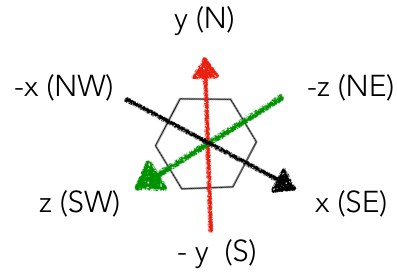

Moving in the hex grid then maps to:

```         
            X   Y   Z
       N    0   1  -1
       S    0  -1   1
       NE   1   0  -1
       SE   1  -1   0
       SW  -1   0   1
       NW  -1   1   0
```

and we can see that 1 step in the hex domain maps to two steps in the Cartesian domain. In other words, the Manhattan distance in Cartesian space must be halved to get the Manhattan distance in hex space.

In [2]:
def read_data(filename="data/input11.data"):
    with open(filename) as f:
        return f.read()

In [3]:
def mdist(x, y, z):
    """
    Given a Cartesian coordinate, return the hex-space Manhattan 
    distance from the origin.
    """
    return (abs(x)+abs(y)+abs(z)) // 2

In [8]:
def part1(path):
    """
    Find the hex-space Manhattan distance between the endpoint
    of the walked path and the origin.
    """
    x, y, z = 0, 0, 0

    offset = {
        "n":  (0, 1, -1), "ne": (1, 0, -1),
        "se": (1, -1, 0), "s":  (0, -1, 1),
        "sw": (-1, 0, 1), "nw": (-1, 1, 0)
    }

    for step in path:
        delta = offset[step]
        x, y, z = x+delta[0], y+delta[1], z+delta[2]
        
    return mdist(x, y, z)

In [9]:
data = read_data()
path = data.split(",")

In [10]:
part1(path)

643

Yay! Gold star!

In [11]:
def part2(path):
    """
    Find the maximum Manhattan distance for any point along
    the path. 
    """
    x, y, z = 0, 0, 0

    offset = {
        "n":  (0, 1, -1), "ne": (1, 0, -1),
        "se": (1, -1, 0), "s":  (0, -1, 1),
        "sw": (-1, 0, 1), "nw": (-1, 1, 0)
    }

    maxdist = 0
    for step in path:
        delta = offset[step]
        x, y, z = x+delta[0], y+delta[1], z+delta[2]
        maxdist = max(maxdist, mdist(x, y, z))
        
    return maxdist


In [12]:
part2(path)

1471

Both parts of this puzzle are complete! Lesson of the day: follow and read links given in the description.